In [ ]:
import pandas as pd
import io
from google.colab import files
import datetime
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np
import seaborn as sns

# UFO SIGHTINGS AND EDUCATION IN THE UNITED STATES

**By: Max Sohl (sohl@calpoly.edu), Harshal Suryawanshi (hsuryawa@calpoly.edu), and Kathleen Gendotti (kgendott@calpoly.edu)**

**Hypothesis:** We anticipate that higher frequencies of reported UFO sightings in the United States are correlated with US counties that have less educated adults. We assume this, because education should provide people with the ability to accept that things they don't understand in the sky are likely to be experimental aircraft, stars, or whatever else.

# Aliens and Education

In [ ]:
url = 'https://raw.githubusercontent.com/maxsohl/GSB521FinalProj/main/ufo_sightings_scrubbed.csv'
df = pd.read_csv(url)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [ ]:
#Only include country = US
us_df = df.loc[df["country"] == "us"]
us_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


### Subset Data to only inlude data from 1990 and up

In [ ]:
print(us_df.dtypes)

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object


In [ ]:
us_df['datetime'] = pd.to_datetime(us_df['datetime']) #convert to datetime data type
us_df['date'] = us_df['datetime'].dt.date #seperate into two columns
us_df['time'] = us_df['datetime'].dt.time
pd.to_datetime(us_df['date'])
us_df['year'] = us_df['date'].apply(lambda x: x.strftime('%Y'))
us_df['year'] = us_df['year'].astype(int)
year_to_filter = 2000
us_df_2000 = us_df[us_df['year'] > year_to_filter]
us_df_2000

### Visualize the UFO Data

In [ ]:
us_df_2000_by_state = us_df_2000[['state','date']].groupby(by='state').count().reset_index()
us_df_2000_by_state = us_df_2000_by_state.rename(columns={'date': 'no_sightings'})
us_df_2000_by_state = us_df_2000_by_state.sort_values(by=['no_sightings'], ascending=False)
#us_df_2000_by_state.head()

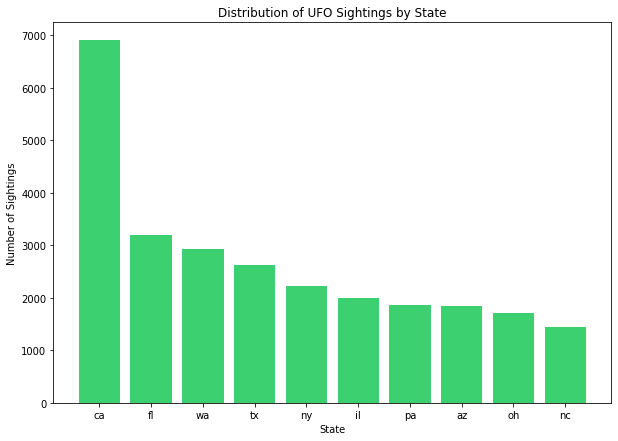

In [ ]:
top_states = us_df_2000_by_state['state'].head(12)
top_sightings = us_df_2000_by_state['no_sightings'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(top_states[0:10], top_sightings[0:10], color='#3cd070')
 
# Add Labels and Show Plot
plt.title("Distribution of UFO Sightings by State")
plt.xlabel('State') 
plt.ylabel('Number of Sightings') 
plt.show()

In [ ]:
us_df_2000_by_year = us_df_2000[['year','date']].groupby(by='year').count().reset_index()
us_df_2000_by_year = us_df_2000_by_year.rename(columns={'date': 'no_sightings'})
#us_df_2000_by_year.head()

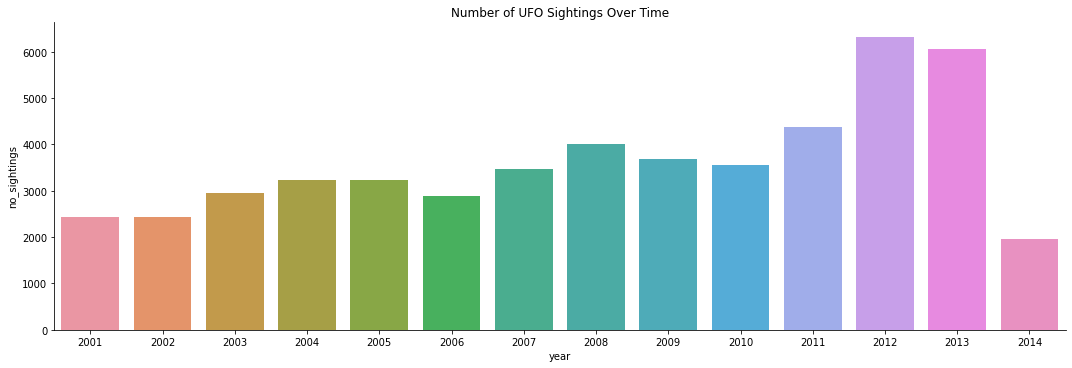

In [ ]:
sns.catplot(x='year',y='no_sightings',data=us_df_2000_by_year,kind='bar',aspect=3).set(title='Number of UFO Sightings Over Time')

In [ ]:
us_df_2000_by_state['state'] = us_df_2000_by_state['state'].str.upper()
us_df_2000_by_state.sort_index()
us_df_2000_by_state = us_df_2000_by_state.sort_values(by = 'no_sightings',ascending = False)
ufo_sighting_by_state_top20 = us_df_2000_by_state.head(20)
ufo_sighting_by_state_top20

# Education Data

In [ ]:
# Education Data by County (1971 - 2021)
education_df = pd.read_excel("EducationByCounty.xlsx")
education_df.head()

,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2008-12","High school diploma only, 2008-12","Some college or associate's degree, 2008-12","Bachelor's degree or higher, 2008-12","Percent of adults with less than a high school diploma, 2008-12","Percent of adults with a high school diploma only, 2008-12","Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,11717266.0,47.7,31.1,10.6,10.7,44535197.0,45947035.0,20794975.0,21558480.0,33.5,34.6,15.7,16.2,39343718.0,47642763.0,39571702.0,32310253.0,24.8,30.0,24.9,20.3,35715625.0,52168981.0,49864428.0,44462605.0,19.6,28.6,27.4,24.4,29179819.0,57706852.0,59244324.0,58205022.0,14.280311,28.241155,28.993579,28.484955,25050356.0,59636386.0,64656741.0,75808834.0,11.125960,26.487130,28.716889,33.670022
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,141936.0,58.7,25.9,7.5,7.8,964840.0,704207.0,278205.0,270063.0,43.5,31.8,12.5,12.2,843638.0,749591.0,553512.0,399228.0,33.1,29.4,21.7,15.7,714081.0,877216.0,746495.0,549608.0,24.7,30.4,25.9,19.0,551030.0,991406.0,918987.0,705001.0,17.402281,31.309957,29.022866,22.264896,430047.0,1041209.0,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,6145.0,2104.0,2117.0,40.6,35.2,12.1,12.1,6252.0,6671.0,4912.0,3026.0,30.0,32.0,23.5,14.5,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,5232.0,11874.0,10409.0,7629.0,14.887321,33.786706,29.618142,21.707831,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,15380.0,6

In [ ]:
#us_df_2010 = us_df_1990.head()

In [ ]:
education_df_2012 = education_df[["State", "Less than a high school diploma, 2008-12"]]
education_df_2012.head()

,State,"Less than a high school diploma, 2008-12"
0,US,29179819.0
1,AL,551030.0
2,AL,5232.0
3,AL,14792.0
4,AL,5013.0


In [ ]:
education_df_2012_by_state = education_df_2012.pivot_table(index='State', values= [ "Less than a high school diploma, 2008-12"], aggfunc='sum')
education_df_2012_by_state = education_df_2012[['State', "Less than a high school diploma, 2008-12"]].groupby(by='State').sum().reset_index()
education_df_2012_by_state = education_df_2012_by_state.drop([45])
education_df_2012_by_state

In [ ]:
df1 = pd.merge(education_df_2012_by_state, ufo_sighting_by_state_top20, left_on='State', right_on='state')
education_df_2012_by_state = df1[["State", "Less than a high school diploma, 2008-12"]]

## **Visualizing relationship between UFO sightings and level of education**

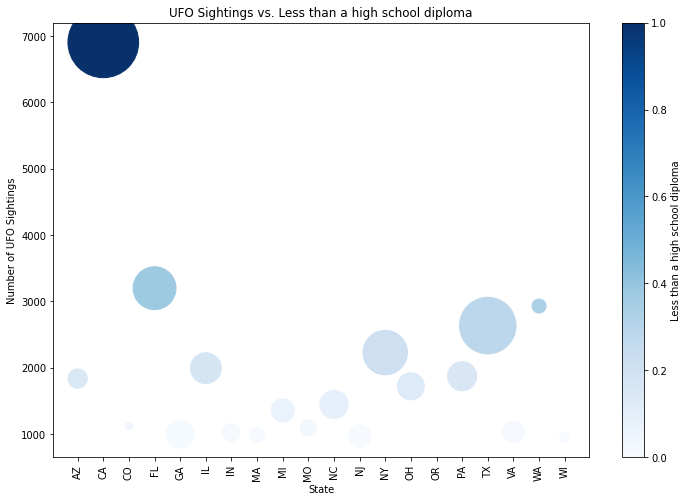

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# group sightings and education data by state
sightings_by_state = ufo_sighting_by_state_top20.groupby('state')['no_sightings'].sum()
education_by_state = education_df_2012_by_state.groupby('State')["Less than a high school diploma, 2008-12"].sum()

# create a dataframe with the data
data = pd.DataFrame({'UFO Sightings': sightings_by_state,
                     'Less than a high school diploma, 2008-12': education_by_state})

# scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x=data.index, y=data['UFO Sightings'], s=data_scaled[:, 1]*5000, c=data_scaled[:, 0], cmap='Blues')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.title('UFO Sightings vs. Less than a high school diploma')
plt.colorbar(label='Less than a high school diploma')
plt.show()


**Next Steps:**
- After running a geocoder loop for 24 hours we were unable to match city names to county in order to match our ufo sighting data with county level census data for population and education. We plan to explore other methods such as AWS to make this work.
- Adjust our data to be aggregated by US state county instead of state
- Normalize our data to account for population size by dividing ufo sightings by county population. 
- Look into the statistical significance of our findings
- Consider confounding variables
- Create geoheat map
